In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as datareader
from datetime import date,timedelta

In [2]:
start='2011-01-01'
end=date.today()
data=datareader.DataReader('AAPL','yahoo',start,end)
data1=datareader.DataReader('MSFT','yahoo',start,end)
data_copy=data.copy()
data1_copy=data1.copy()
data.head(100)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.849806
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.063864
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.116387
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.199141
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.190899
...,...,...,...,...,...,...
2011-05-18,12.180357,12.000000,12.016786,12.138214,334776400.0,10.378389
2011-05-19,12.228929,12.095357,12.217143,12.161786,261170000.0,10.398548
2011-05-20,12.176786,11.965000,12.127143,11.972143,337968400.0,10.236397


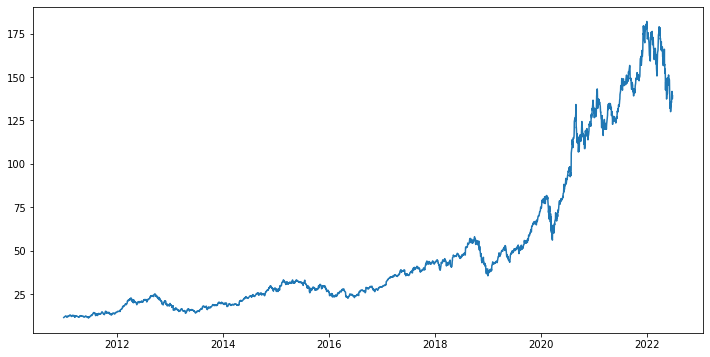

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data.Close)

In [4]:
data=data.reset_index()
data1=data1.reset_index()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2893 non-null   datetime64[ns]
 1   High       2893 non-null   float64       
 2   Low        2893 non-null   float64       
 3   Open       2893 non-null   float64       
 4   Close      2893 non-null   float64       
 5   Volume     2893 non-null   float64       
 6   Adj Close  2893 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 158.3 KB


In [6]:
data['Date'] = pd.to_datetime(data['Date'], format = '%Y%m%d')
data1['Date'] = pd.to_datetime(data1['Date'], format = '%Y%m%d')

In [7]:
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

data1['day'] = data1['Date'].dt.day
data1['month'] = data1['Date'].dt.month
data1['year'] = data1['Date'].dt.year

In [8]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,day,month,year
0,2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.849806,31,12,2010
1,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.063864,3,1,2011
2,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.116387,4,1,2011
3,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.199141,5,1,2011
4,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.190899,6,1,2011


In [9]:
data['ma100'] = data.Close.rolling(100).mean()
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,day,month,year,ma100
2888,2022-06-23,138.589996,135.630005,136.820007,138.270004,72433800.0,138.270004,23,6,2022,158.962101
2889,2022-06-24,141.910004,139.770004,139.899994,141.660004,89047400.0,141.660004,24,6,2022,158.630901
2890,2022-06-27,143.490005,140.970001,142.699997,141.660004,70207900.0,141.660004,27,6,2022,158.301401
2891,2022-06-28,143.419998,137.320007,142.130005,137.440002,67083400.0,137.440002,28,6,2022,157.917401
2892,2022-06-29,140.669998,136.669998,137.460007,139.229996,66177800.0,139.229996,29,6,2022,157.580701


In [10]:
data['ma200'] = data.Close.rolling(200).mean()
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,day,month,year,ma100,ma200
2888,2022-06-23,138.589996,135.630005,136.820007,138.270004,72433800.0,138.270004,23,6,2022,158.962101,158.65155
2889,2022-06-24,141.910004,139.770004,139.899994,141.660004,89047400.0,141.660004,24,6,2022,158.630901,158.58430
2890,2022-06-27,143.490005,140.970001,142.699997,141.660004,70207900.0,141.660004,27,6,2022,158.301401,158.52225
2891,2022-06-28,143.419998,137.320007,142.130005,137.440002,67083400.0,137.440002,28,6,2022,157.917401,158.46460
2892,2022-06-29,140.669998,136.669998,137.460007,139.229996,66177800.0,139.229996,29,6,2022,157.580701,158.41300


In [11]:
data1['ma200'] = data1.Close.rolling(200).mean()
data1['ma100'] = data1.Close.rolling(100).mean()

In [12]:
data1=data1.dropna()


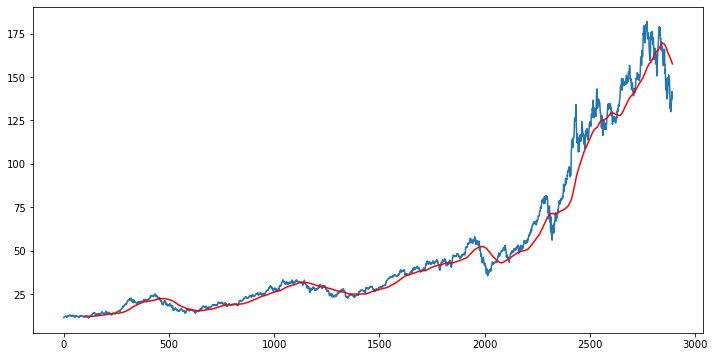

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(data.Close)
plt.plot(data['ma100'],'r')

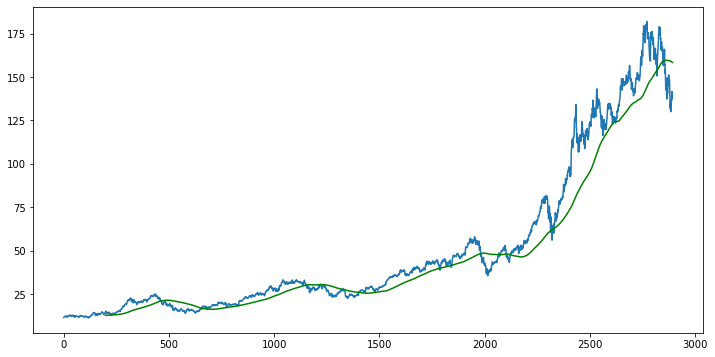

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(data.Close)
plt.plot(data['ma200'],'g')

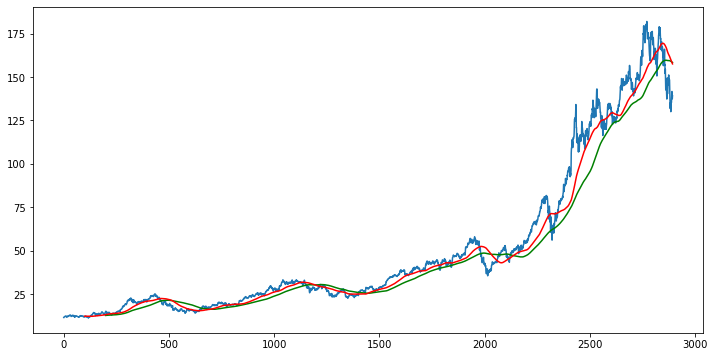

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(data.Close)
plt.plot(data['ma200'],'g')
plt.plot(data['ma100'],'r')

In [16]:
data=data.dropna()
print(data.shape)
data.head(100)

(2694, 12)


,Date,High,Low,Open,Close,Volume,Adj Close,day,month,year,ma100,ma200
199,2011-10-14,15.071429,14.831071,14.886786,15.071429,5.733672e+08,12.886345,14,10,2011,13.174182,12.727036
200,2011-10-17,15.239286,14.855000,15.062143,14.999643,6.860448e+08,12.824963,17,10,2011,13.203900,12.744434
201,2011-10-18,15.171786,14.856786,15.062857,15.080000,8.816024e+08,12.893669,18,10,2011,13.235057,12.760982
202,2011-10-19,14.586429,14.207143,14.333929,14.236429,1.104060e+09,12.172401,19,10,2011,13.256918,12.773005
203,2011-10-20,14.298214,14.078929,14.285714,14.118214,5.492704e+08,12.071324,20,10,2011,13.273875,12.783954
...,...,...,...,...,...,...,...,...,...,...,...,...
294,2012-03-02,19.528570,19.375713,19.437143,19.470715,4.317124e+08,16.647808,2,3,2012,15.148071,14.100500
295,2012-03-05,19.552856,18.785713,19.479286,19.041430,8.091244e+08,16.280771,5,3,2012,15.199625,14.135016
296,2012-03-06,19.060356,18.436428,18.702143,18.937857,8.102388e+08,16.192209,6,3,2012,15.246043,14.168896
297,2012-03-07,19.206429,18.689285,19.171429,18.953215,7.985208e+08,16.205334,7,3,2012,15.291936,14.203802


In [17]:
Index=data.Date
Index

199    2011-10-14
200    2011-10-17
201    2011-10-18
202    2011-10-19
203    2011-10-20
          ...    
2888   2022-06-23
2889   2022-06-24
2890   2022-06-27
2891   2022-06-28
2892   2022-06-29
Name: Date, Length: 2694, dtype: datetime64[ns]

In [18]:
X=data[['day','month','year','ma100','ma200']]
X

,day,month,year,ma100,ma200
199,14,10,2011,13.174182,12.727036
200,17,10,2011,13.203900,12.744434
201,18,10,2011,13.235057,12.760982
202,19,10,2011,13.256918,12.773005
203,20,10,2011,13.273875,12.783954
...,...,...,...,...,...
2888,23,6,2022,158.962101,158.651550
2889,24,6,2022,158.630901,158.584300
2890,27,6,2022,158.301401,158.522250
2891,28,6,2022,157.917401,158.464600


In [19]:
y=data['Close']

In [20]:
X.shape

(2694, 5)

In [21]:
X=X.dropna()

In [22]:
X.shape

(2694, 5)

In [23]:
X.head()

,day,month,year,ma100,ma200
199,14,10,2011,13.174182,12.727036
200,17,10,2011,13.203900,12.744434
201,18,10,2011,13.235057,12.760982
202,19,10,2011,13.256918,12.773005
203,20,10,2011,13.273875,12.783954


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [25]:
print(X_train.head())
y_train.head()

      day  month  year      ma100      ma200
1948   27      9  2018  50.121175  46.571475
877    27      6  2014  20.385186  19.532836
314    30      3  2012  16.415564  14.974739
1902   24      7  2018  45.337825  43.828200
2104   14      5  2019  44.552100  48.115338


1948    56.237499
877     22.995001
314     21.412500
1902    48.250000
2104    47.165001
Name: Close, dtype: float64

In [26]:
print(X_test.head())
y_test.head()

      day  month  year       ma100       ma200
2802   17      2  2022  161.802100  150.912600
1976    6     11  2018   52.225225   48.144438
628     2      7  2013   15.582893   17.936045
1689   18      9  2017   38.197475   35.342037
1835   18      4  2018   43.060725   41.317538


2802    168.880005
1976     50.942501
628      14.946071
1689     39.667500
1835     44.459999
Name: Close, dtype: float64

In [27]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression().fit(X_train,y_train)

In [28]:
print(Model.score(X_test,y_test))


0.980258191703794


In [29]:
Model.coef_

array([-0.01516962,  0.24649641,  0.74233622,  1.61321196, -0.66912156])

In [30]:
Model.intercept_

-1494.843240338421

In [31]:
print(Model.predict(X))
output = pd.DataFrame(Model.predict(X))
print(output)



[ 12.98430431  12.97509514  12.99911582 ... 156.53305532 155.93698725
 155.41317589]
               0
0      12.984304
1      12.975095
2      12.999116
3      13.011167
4      13.016027
...          ...
2689  157.573065
2690  157.068598
2691  156.533055
2692  155.936987
2693  155.413176

[2694 rows x 1 columns]


In [32]:
y.index=Index


In [33]:
output.index=Index
output

,0
Date,
2011-10-14,12.984304
2011-10-17,12.975095
2011-10-18,12.999116
2011-10-19,13.011167
2011-10-20,13.016027
...,...
2022-06-23,157.573065
2022-06-24,157.068598
2022-06-27,156.533055


Text(0, 0.5, 'Predicted')

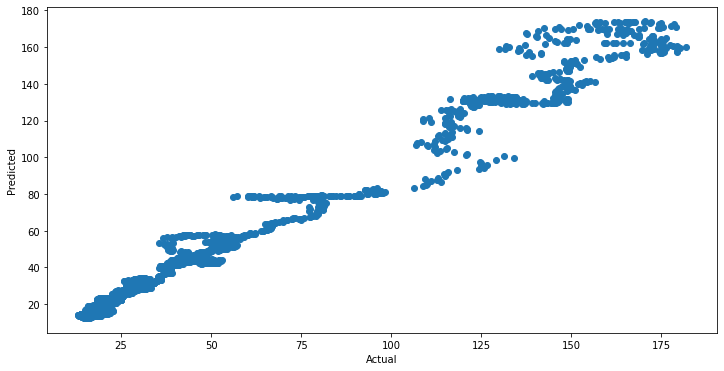

In [34]:
plt.figure(figsize= (12,6))
plt.scatter(y,output)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

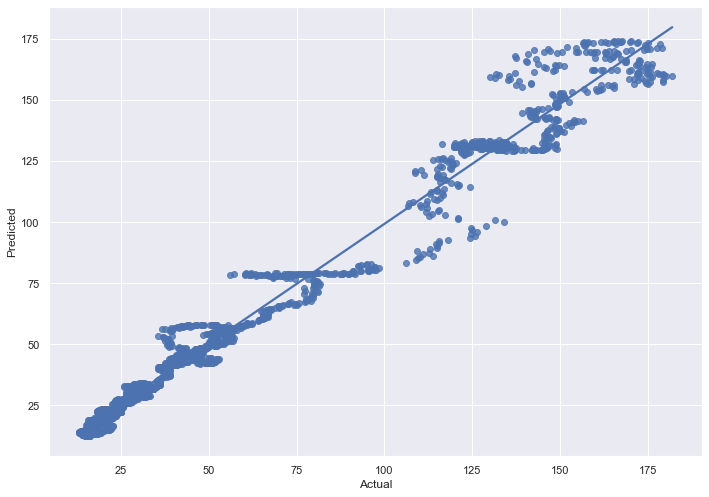

In [35]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
p=sns.regplot(x=y,y=output,ci=None,color ='b');
p.set_xlabel("Actual")
p.set_ylabel("Predicted")

In [36]:
data1=data1.dropna()
Index1=data1.Date
data1.shape

(2694, 12)

In [37]:
output = pd.DataFrame(Model.predict(data1[['day','month','year','ma100','ma200']]))
print(output)
print(data1.head())

               0
0      24.249173
1      24.251784
2      24.281445
3      24.307720
4      24.328511
...          ...
2689  263.409497
2690  262.804895
2691  262.159934
2692  261.356804
2693  260.803264

[2694 rows x 1 columns]
          Date       High        Low       Open      Close      Volume  \
199 2011-10-14  27.500000  27.020000  27.309999  27.270000  50947700.0   
200 2011-10-17  27.420000  26.850000  27.110001  26.980000  39453300.0   
201 2011-10-18  27.400000  26.799999  26.940001  27.309999  52487900.0   
202 2011-10-19  27.469999  27.010000  27.370001  27.129999  42880000.0   
203 2011-10-20  27.340000  26.400000  27.260000  27.040001  76300200.0   

     Adj Close  day  month  year     ma200    ma100  
199  21.811577   14     10  2011  26.06830  25.6907  
200  21.579622   17     10  2011  26.06365  25.7186  
201  21.843567   18     10  2011  26.06030  25.7450  
202  21.699604   19     10  2011  26.05550  25.7687  
203  21.627613   20     10  2011  26.05070  25.7890  


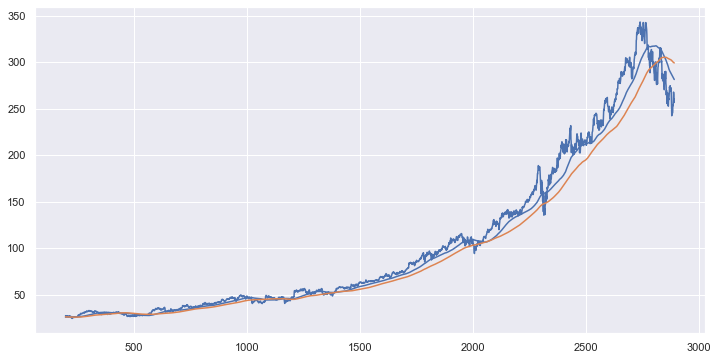

In [38]:
plt.figure(figsize= (12,6))
plt.plot(data1.Close, 'b' ,label= 'Original Price')
plt.plot(data1['ma100'])
plt.plot(data1['ma200'])

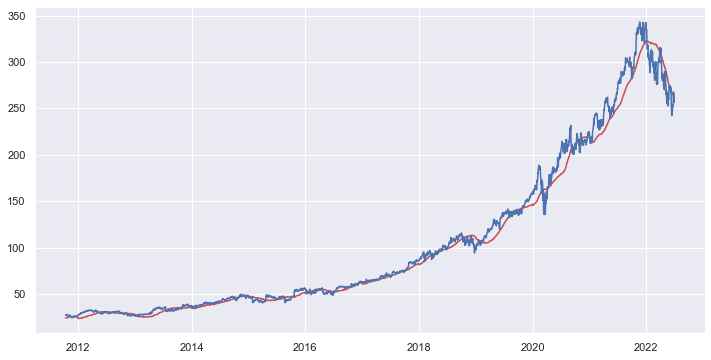

In [39]:
output.index=Index1
data1.index=Index1
plt.figure(figsize= (12,6))
plt.plot(output, 'r' ,label= 'Predicted Price')
plt.plot(data1.Close, 'b' ,label= 'Original Price')

Text(0, 0.5, 'Predicted')

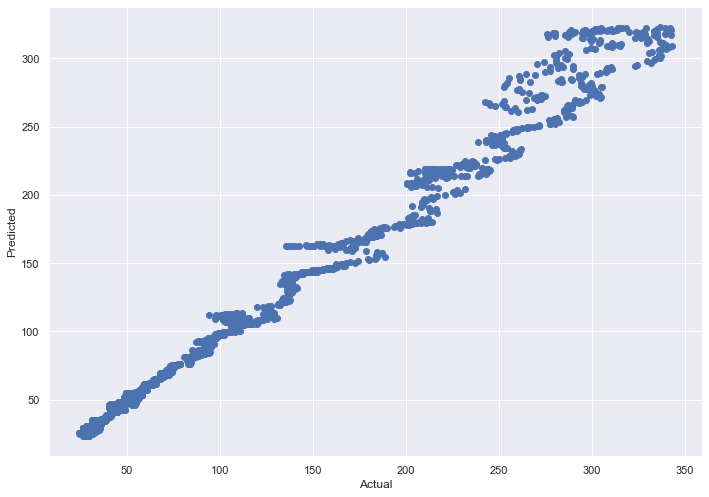

In [45]:
plt.figure(figsize= (11.7,8.27))
plt.scatter(data1.Close,output)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0.5, 0, 'Actual')

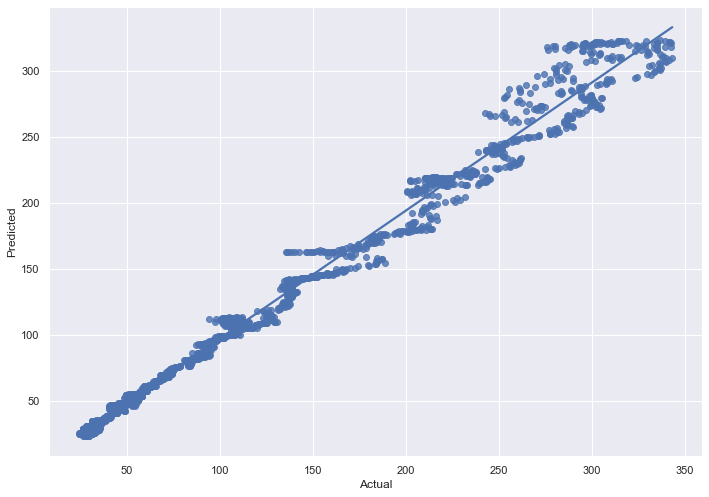

In [41]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
p=sns.regplot(x=data1.Close,y=output,ci=None,color ='b')
p.set_ylabel("Predicted")
p.set_xlabel("Actual")

In [42]:
data1.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,day,month,year,ma200,ma100
Date,,,,,,,,,,,,
2022-06-23,2022-06-23,259.369995,253.630005,255.570007,258.859985,25861400.0,258.859985,23,6,2022,299.76645,283.0992
2022-06-24,2022-06-24,267.980011,261.720001,261.809998,267.700012,33900700.0,267.700012,24,6,2022,299.60390,282.6664
2022-06-27,2022-06-27,268.299988,263.279999,268.209991,264.890015,24615100.0,264.890015,27,6,2022,299.44210,282.2277
2022-06-28,2022-06-28,266.910004,256.320007,263.980011,256.480011,27295500.0,256.480011,28,6,2022,299.24595,281.6579
2022-06-29,2022-06-29,261.970001,255.759995,257.589996,260.260010,20042400.0,260.260010,29,6,2022,299.06230,281.2480


### Share Price Prediction for tommorow

In [43]:
day=date.today()+timedelta(1)
print(day)

2022-07-01


In [44]:
aaa=date.today()-timedelta(1)
bbb=data1.iloc[-1]
string_date=aaa.strftime('%Y-%m-%d')
tomorrow_prediction=(Model.predict([[day.day,day.month,day.year,bbb['ma100'],bbb['ma200']]]))
print(tomorrow_prediction)

[261.47450936]
